In [7]:
import pandas as pd


In [8]:
import numpy as np 


In [9]:
import nltk


In [10]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


In [76]:
df = pd.read_csv("D:\\New folder\\data.csv")
df.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 1450, 'final': ...","[574941, 7]","[{'name': 'default', 'title': 'Buy Counter-Str...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 137378},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[29],"[{'name': 'default', 'title': 'Buy Team Fortre...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 5474},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,"English, French, German, Italian, Spanish - Spain",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[30],"[{'name': 'default', 'title': 'Buy Day of Defe...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 3694},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum':

In [77]:
df = df[1:].reset_index(drop=True)



In [85]:
df.columns[0]


'type'

In [86]:
len(df.columns)

39

In [87]:
df.head(5)


,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[29],"[{'name': 'default', 'title': 'Buy Team Fortre...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 5474},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,"English, French, German, Italian, Spanish - Spain",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[30],"[{'name': 'default', 'title': 'Buy Day of Defe...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 3694},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
2,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[31],"[{'name': 'default', 'title': 'Buy Deathmatch ...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 1924},NaN,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,NaN,"English, French, German, Korean",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Gearbox So

In [88]:
corr_columns = ['Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Unnamed']

df.rename(columns=dict(zip(df.columns[:7], corr_columns)), inplace=True)

In [89]:
df.head()


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Unnamed,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[29],"[{'name': 'default', 'title': 'Buy Team Fortre...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 5474},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,"English, French, German, Italian, Spanish - Spain",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[30],"[{'name': 'default', 'title': 'Buy Day of Defe...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 3694},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
2,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[31],"[{'name': 'default', 'title': 'Buy Deathmatch ...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 1924},NaN,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,NaN,"English, French, German, Korean",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Gearb

In [90]:
df['year'] = df['Release date'].str.extract(r'(\d{4})')


<Axes: xlabel='year'>

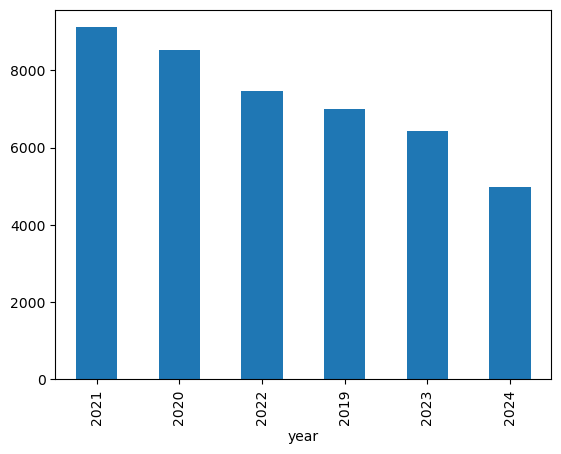

In [92]:
data['year'].value_counts().plot(kind='bar')


In [93]:
data['year'] = data['year'].astype(int)


In [94]:
data = data[data['year'] > 2018]


In [95]:
data.shape


(43500, 7)

<Axes: >

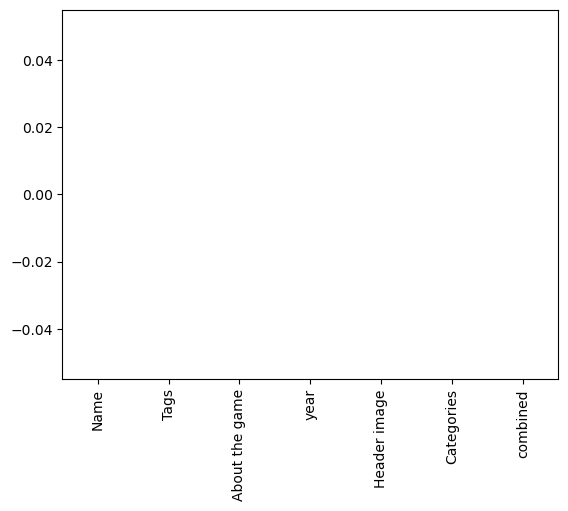

In [96]:
data.isna().sum().plot(kind='bar')


In [97]:
data.dropna(axis=0,inplace=True)


<Axes: >

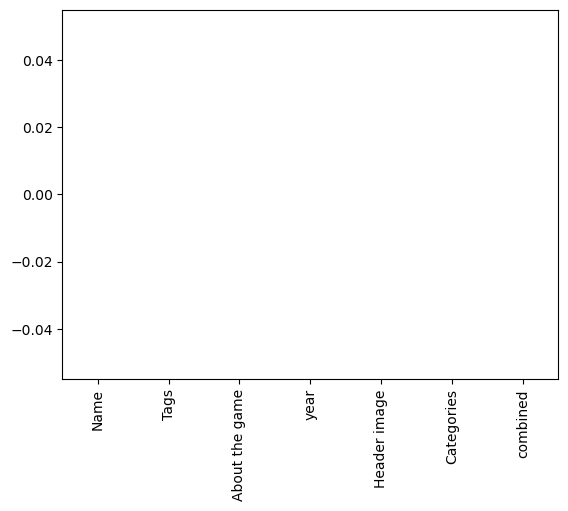

In [98]:
data.isna().sum().plot(kind='bar')


In [99]:
data.head()


,Name,Tags,About the game,year,Header image,Categories,combined
0,henosis,"{platformer,atmospheric,surreal,mystery,puzzle...",henosis is a mysterious d platform puzzler whe...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Full controller support","henosis Single-player,Full controller support"
1,two weeks in painland,"{rich, indie,adventure,nudity,violent,sexual, ...",about the game play as a hacker who has arrang...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements","two weeks in painland Single-player,Steam Achi..."
2,wartune reborn,"{turn-based, game,strategy,2.5d,magic,medieval...",feel tired of autofight feel tired of boring n...,2021,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Multi-player,MMO,PvP,Online PvP,...","wartune reborn Single-player,Multi-player,MMO,..."
3,td worlds,"{value,perma, tactics,strategy,minimalist,abst...",td worlds is a dynamic highly strategical game...,2022,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements,Steam Cloud","td worlds Single-player,Steam Achievements,Ste..."
4,mazm jekyll and hyde,"{adventure,simulation,rpg,strategy,singleplaye...",mazm jekyll and hyde is a darkly entertaining ...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements,Full controll...","mazm jekyll and hyde Single-player,Steam Achie..."


In [101]:
data.reset_index(drop=True,inplace=True)


In [102]:
data['Name'] = data['Name'].str.replace(r'[^a-zA-Z0-9\s]','',regex=True).str.strip().str.lower()

In [103]:
data['About the game'] = data['About the game'].str.replace(r'[^a-zA-Z\s]','',regex=True).str.strip().str.lower()

In [104]:
data['About the game']


0        henosis is a mysterious d platform puzzler whe...
1        about the game play as a hacker who has arrang...
2        feel tired of autofight feel tired of boring n...
3        td worlds is a dynamic highly strategical game...
4        mazm jekyll and hyde is a darkly entertaining ...
                               ...                        
43495    features  survival game in a postapocalyptic o...
43496    awakened by death itself you must ascend throu...
43497    about orebound orebound is a voxel factory aut...
43498                                                     
43499    la llorona wants your soul offers a unique hor...
Name: About the game, Length: 43500, dtype: object

In [105]:
data.columns


Index(['Name', 'Tags', 'About the game', 'year', 'Header image', 'Categories',
       'combined'],
      dtype='object')

Processing

In [106]:
data['Tags'] = data['Tags'].apply(
    lambda x: set(x.lower().split()) if isinstance(x, str) else set(map(str.lower, x))
)

In [107]:
data['Tags'][:3]


0    {platformer,atmospheric,surreal,mystery,puzzle...
1    {indie,adventure,nudity,violent,sexual, conten...
2    {turn-based, game,strategy,2.5d,magic,medieval...
Name: Tags, dtype: object

In [108]:
data = data.iloc[:43500]

In [109]:
data['combined'] = data['Name']+' '+data["Categories"]


In [110]:
vectorizer = TfidfVectorizer(stop_words='english')
games_vector = vectorizer.fit_transform(data['combined'])

In [111]:
data.shape


(43500, 7)

In [112]:
from scipy.sparse import csr_matrix
from tqdm.auto import tqdm

# Convert to a sparse matrix if not already
games_vector_sparse = csr_matrix(games_vector)

# Get number of rows correctly
num_rows = games_vector_sparse.shape[0]  

chunk_size = 900
num_chunks = (num_rows // chunk_size)   

# Initialize similarity matrix
sim_matrix = np.zeros((num_rows, num_rows))

# Compute cosine similarity in chunks
for i in tqdm(range(num_chunks), desc="Computing Cosine Similarity"):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, num_rows)  
    
    chunk_sim = cosine_similarity(games_vector_sparse[start:end], games_vector_sparse)
    
    sim_matrix[start:end, :] = chunk_sim  

Computing Cosine Similarity:   0%|          | 0/48 [00:00<?, ?it/s]

In [113]:
pip install TheFuzz


Note: you may need to restart the kernel to use updated packages.


In [115]:
from thefuzz  import process


In [116]:
def correct_name(title,threshold=80):
    game_names = data['Name'].tolist()
    best_match,score = process.extractOne(title,game_names)

    if score >= threshold :
        return best_match 
    else  : 
        return None

In [117]:
# testing 
correct_name('balck mansion')

'black mansion'

In [118]:
import numpy as np
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection/union if union !=0 else 0

def recommend_game(title, n_recommendation=5, alpha=0.3):
    # Normalize input title and dataset titles
    title = title.lower().strip()
    data['Name'] = data['Name'].str.lower().str.strip()

    # Check if the title exists in the dataset
    if title not in data['Name'].values:
        corr_title = correct_name(title)
        if corr_title in data['Name'].values:
            title = corr_title
        else:
            return "Game not found. Please check the name and try again."

    # Find the index of the given game title
    g_idx = data[data['Name'] == title].index[0]
    jaccard_scores = []

    # Compute Jaccard similarity scores
    for idx in range(len(data)):
        if idx == g_idx:
            jaccard_scores.append(0)
        else:
            jaccard_scores.append(jaccard_similarity(data.loc[g_idx, 'Tags'], data.loc[idx, 'Tags']))

    jaccard_scores = np.array(jaccard_scores)

    # Normalize the scores
    if np.max(jaccard_scores) > 0:
        jaccard_scores /= np.max(jaccard_scores)

    # Get cosine similarity scores
    cosine_scores = sim_matrix[g_idx]
    if np.max(cosine_scores) > 0:
        cosine_scores /= np.max(cosine_scores)

    # Combine both scores
    final_score = alpha * cosine_scores + (1 - alpha) * jaccard_scores
    recomm_idx = final_score.argsort()[::-1][1:n_recommendation+1]  # Fix indexing

    similar_games = data.iloc[recomm_idx]['Name'].tolist()
    output = f"**Recommended games for '{title}':**\n\n"
    game_list = []
    for idx in recomm_idx:
            game_name = data['Name'].iloc[idx]  # Get the game name
            game_image = data['Header image'].iloc[idx]  # Get the image URL
            game_list.append((game_image, game_name))

    
    return output, game_list

In [126]:
title = 'forza'
recommend_game(title)

("**Recommended games for 'forza horizon 4':**\n\n",
 [('https://cdn.akamai.steamstatic.com/steam/apps/346820/header.jpg?t=1627370726',
   'crash drive 3'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1222680/header.jpg?t=1649949359',
   'need for speed heat'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1902830/header.jpg?t=1653299869',
   'night racer'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1846380/header.jpg?t=1669984763',
   'need for speed unbound'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1591870/header.jpg?t=1639281773',
   'drift phonk 666')])